In [3]:
#importing data
import pandas as pd
df = pd.read_csv("Iris.csv")
df = df.drop("Unnamed: 0",axis = 1)
df.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [4]:
#splitting data into target and features
from sklearn.model_selection import train_test_split
x = df.drop("Class",axis = 1)
y = df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

print(x.shape)
print(y.shape)


(150, 4)
(150,)


In [14]:
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.svm import LinearSVC
from numpy import mean
cv = LeaveOneOut()
model = LinearSVC()
model.fit(x_train,y_train)
scores = cross_val_score(model, x_train, y_train,cv=cv, n_jobs=-1)
print("cv score mean :",mean(scores))

C:\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


cv score mean : 0.8583333333333333


In [11]:
test_prediction = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(test_prediction,y_test)

0.9666666666666667

<AxesSubplot:title={'center':'SVM classification Confusion Matrix'}, xlabel='Predicted labels', ylabel='True labels'>

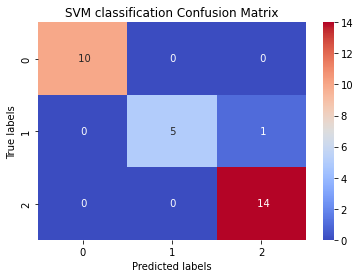

In [13]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, test_prediction)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM classification Confusion Matrix')
ax

degree: 1 accuracy score: 1.0
degree: 2 accuracy score: 1.0
degree: 3 accuracy score: 0.9666666666666667
degree: 4 accuracy score: 0.9666666666666667
degree: 5 accuracy score: 0.9666666666666667
degree: 6 accuracy score: 0.9666666666666667
degree: 7 accuracy score: 0.9666666666666667
degree: 8 accuracy score: 0.9666666666666667
degree: 9 accuracy score: 0.9333333333333333
degree: 10 accuracy score: 0.9333333333333333


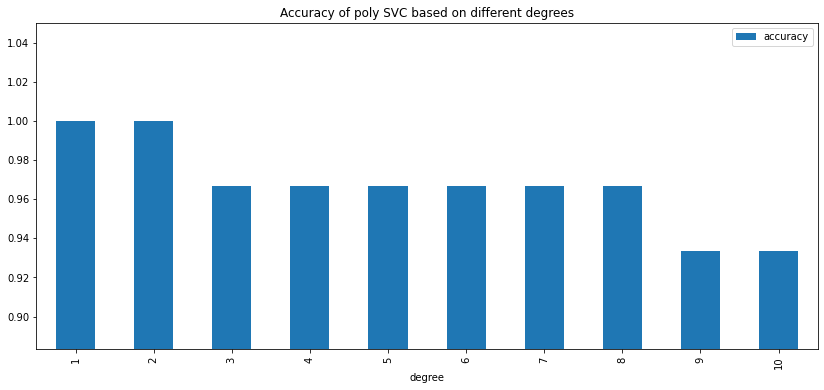

In [27]:
from sklearn.svm import SVC
prediction_accuracy=[]
best_accuracy = 0
best_prediction = None


for degree in range(1,11):
    svc = SVC(kernel = 'poly',degree=degree)
    svc.fit(x_train,y_train)
    prediction = svc.predict(x_test)
    score = accuracy_score(prediction,y_test)
    print("degree:", degree,"accuracy score:",score)
    prediction_accuracy.append([degree,score])
    if score > best_accuracy:
        best_accuracy = score
        best_prediction = prediction.copy()

import math
accuracy_df = pd.DataFrame(prediction_accuracy,columns=['degree','accuracy'])
accuracies = accuracy_df.loc[:,"accuracy"].values.tolist()
max_y_lim = max(accuracies) + .05
min_y_lim = min(accuracies) - .05
ax = accuracy_df.plot.bar(title='Accuracy of poly SVC based on different degrees',x='degree',figsize=(14,6),ylim=[min_y_lim,max_y_lim])

<AxesSubplot:title={'center':'SVM classification Confusion Matrix (best degree)'}, xlabel='Predicted labels', ylabel='True labels'>

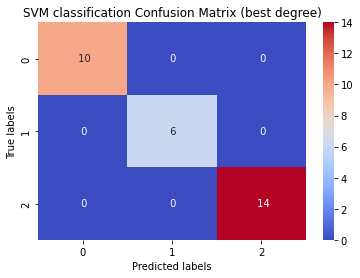

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, best_prediction)
ax = plt.subplot()
sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVM classification Confusion Matrix (best degree)')
ax